# #Lab-Imbalaced_data

In [ ]:
# 1.Load the dataset and explore the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('customer_churn.csv')
data.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [3]:
sum(data.duplicated())

0

In [4]:
#Looking at number of NaN values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#2.We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [5]:
data = data.drop(columns=['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges'], axis=1)
data = data.rename(columns={'Churn':'churn', 'SeniorCitizen':'senior_citizen', 'MonthlyCharges':'monthly_charges'})
data.head()

senior_citizen  tenure  monthly_charges churn
0               0       1            29.85    No
1               0      34            56.95    No
2               0       2            53.85   Yes
3               0      45            42.30    No
4               0       2            70.70   Yes

In [6]:
data.shape

(7043, 4)

In [7]:
display(data.dtypes)

senior_citizen       int64
tenure               int64
monthly_charges    float64
churn               object
dtype: object

In [8]:
data['churn'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
data['senior_citizen'] = data['senior_citizen'].astype('object') #converting tenure into categorical
data.shape

(7043, 4)

In [10]:
data['churn'] = data['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
data['churn'].unique()

array([0, 1])

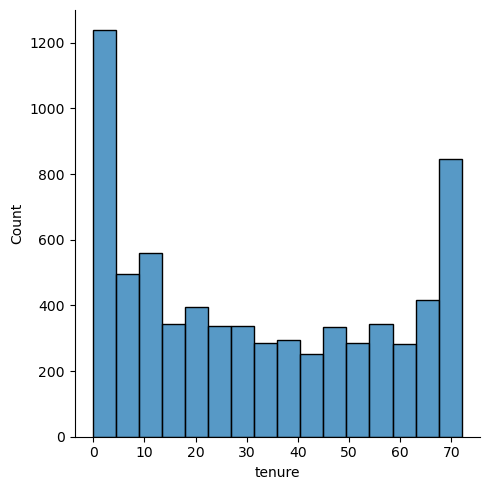

In [12]:
#Running a Displot
sns.displot(data['tenure'])
plt.show()

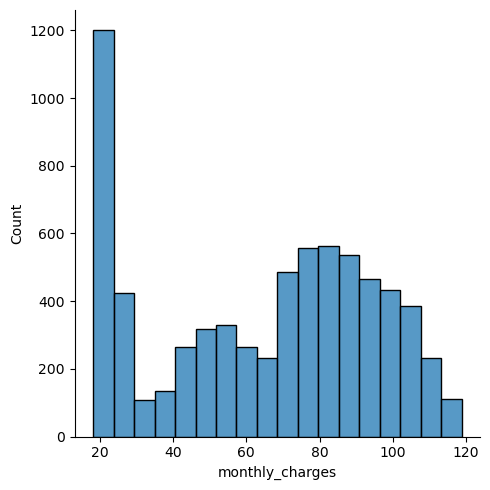

In [13]:
sns.displot(data['monthly_charges'])
plt.show()

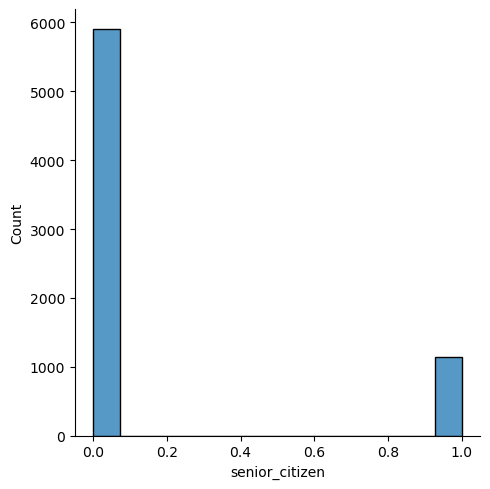

In [14]:
sns.displot(data['senior_citizen'])
plt.show()

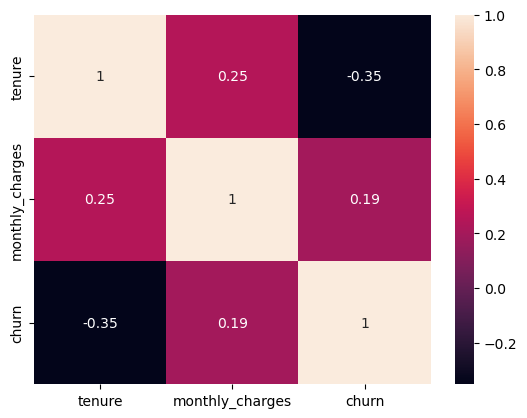

In [15]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [16]:
#3.Extracting the variable

X-Y split

In [17]:
#X-Y Split
y = data['churn']
X = data.drop(['churn'], axis = 1)

In [18]:
X.dtypes

senior_citizen      object
tenure               int64
monthly_charges    float64
dtype: object

In [19]:
y.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [ ]:
#4.Building the Logistic Regression Model

In [20]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2

In [21]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [22]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import StandardScaler

# Scaling data
transformer = StandardScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns = X_train_num.columns)

In [23]:
# Scaling test data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns = X_train_num.columns)

In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encoded.head()

senior_citizen_1
0               0.0
1               1.0
2               0.0
3               0.0
4               0.0

In [25]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encoded], axis=1)

In [26]:
encoder_test_cat = encoder.transform(X_test_cat)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
X_test_cat.head()

senior_citizen_1
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0

In [27]:
X_test_transformed = pd.concat([X_test_norm, X_test_cat], axis=1)

In [28]:
print(X_test_norm)

        tenure  monthly_charges
0    -0.544091        -0.217375
1     1.127890         1.731076
2    -0.788772         0.241378
3    -1.278132        -1.476862
4     0.923990         0.434889
...        ...              ...
1756  1.576470         0.620058
1757 -0.829552        -1.510226
1758  0.638529        -1.491876
1759  1.576470         0.738500
1760  1.291010        -1.335066

[1761 rows x 2 columns]


In [29]:
#5.Let's make the model!

In [30]:
y_train = y_train.reset_index(drop=True) 

In [31]:
y_test = y_test.reset_index(drop=True)

In [32]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs')
classification.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

In [33]:
X_test_transformed.head()

tenure  monthly_charges  senior_citizen_1
0 -0.544091        -0.217375               0.0
1  1.127890         1.731076               0.0
2 -0.788772         0.241378               0.0
3 -1.278132        -1.476862               0.0
4  0.923990         0.434889               0.0

In [34]:
X_train_transformed.head()

tenure  monthly_charges  senior_citizen_1
0 -0.340191        -0.514314               0.0
1  0.883210         0.017840               1.0
2 -1.196572        -0.819594               0.0
3  1.168670        -1.483535               0.0
4 -0.829552         0.658427               0.0

In [35]:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.7808063600227144

In [36]:
classification.score(X_train_transformed, y_train)

0.7925028398333964

In [37]:
print(y_test.value_counts())

0    1298
1     463
Name: churn, dtype: int64


In [38]:
pd.Series(predictions).value_counts()

0    1416
1     345
dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1164,  134],
       [ 252,  211]])

In [40]:
# 6.Evaluate the model.


After running the model, we can see that we have a score of 0.78, and that the False Positive and True Positive are highly correlateed and further help push our model. 

In [41]:
# 7. Even a simple model will give us more than 70% accuracy. Why?


Because there isn't that much information to cloud that database and prediction model when running only with 3 variables.

In [42]:
# 8.Synthetic Minority Oversampling TEchnique (SMOTE) 

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [45]:
X_train_SMOTE.shape

(7752, 3)

In [48]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [49]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]])

Through this model, we received a better prediction and actual values, meaning that the ratio True Negative and True Positive is high. 